### Required

- Check https://jonathansoma.com/lede/data-studio/matplotlib/exporting-from-matplotlib-to-open-in-adobe-illustrator/

- For Mac, download AMS fonts in the OTF format from https://github.com/Happypig375/AMSFonts-Ttf-Otf
 and paste it into Library/Fonts

- List desired Latex preambles as:

    ```python
    sty_path = os.getcwd() + "/custom-definitions"
    latex_preamble = [
        rf'\usepackage{{{sty_path}}}', # Custom style files
        r'\usepackage{{amsmath}}',
        r'\usepackage[OT1]{fontenc}',
        r"\usepackage{algpseudocode}",
    ]
    ```

- Pass the following rcParams
    ```python
    plt.rcParams.update({
        "text.usetex": True,
        'pdf.fonttype': 42, # This enables editing text in Illustrator
        'ps.fonttype': 42,  # This enables editing text in Illustrator
        'text.latex.preamble': '\n'.join(latex_preamble), # Parse the preambles
    })
    ```

- Save it either in 
    - ```.svg``` format: editable as vector graphics
    - ```.pdf``` format: editable also as a text when available

- It is essential to use ```\usepackage[OT1]{fontenc}``` encoding instead of ```[T1]```.


In [1]:
import os
import matplotlib.pyplot as plt

from latex_to_illustrator import generate_latex_equation, generate_algorithm

sty_path = os.getcwd() + "/custom-definitions"
latex_preamble = [
    rf'\usepackage{{{sty_path}}}',
    r'\usepackage[OT1]{fontenc}'
    r"\usepackage{algpseudocode}",
]

plt.rcParams.update({
    "text.usetex": True,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'text.latex.preamble': '\n'.join(latex_preamble),
    'font.size': 18
})

### All equations listed line-by-line

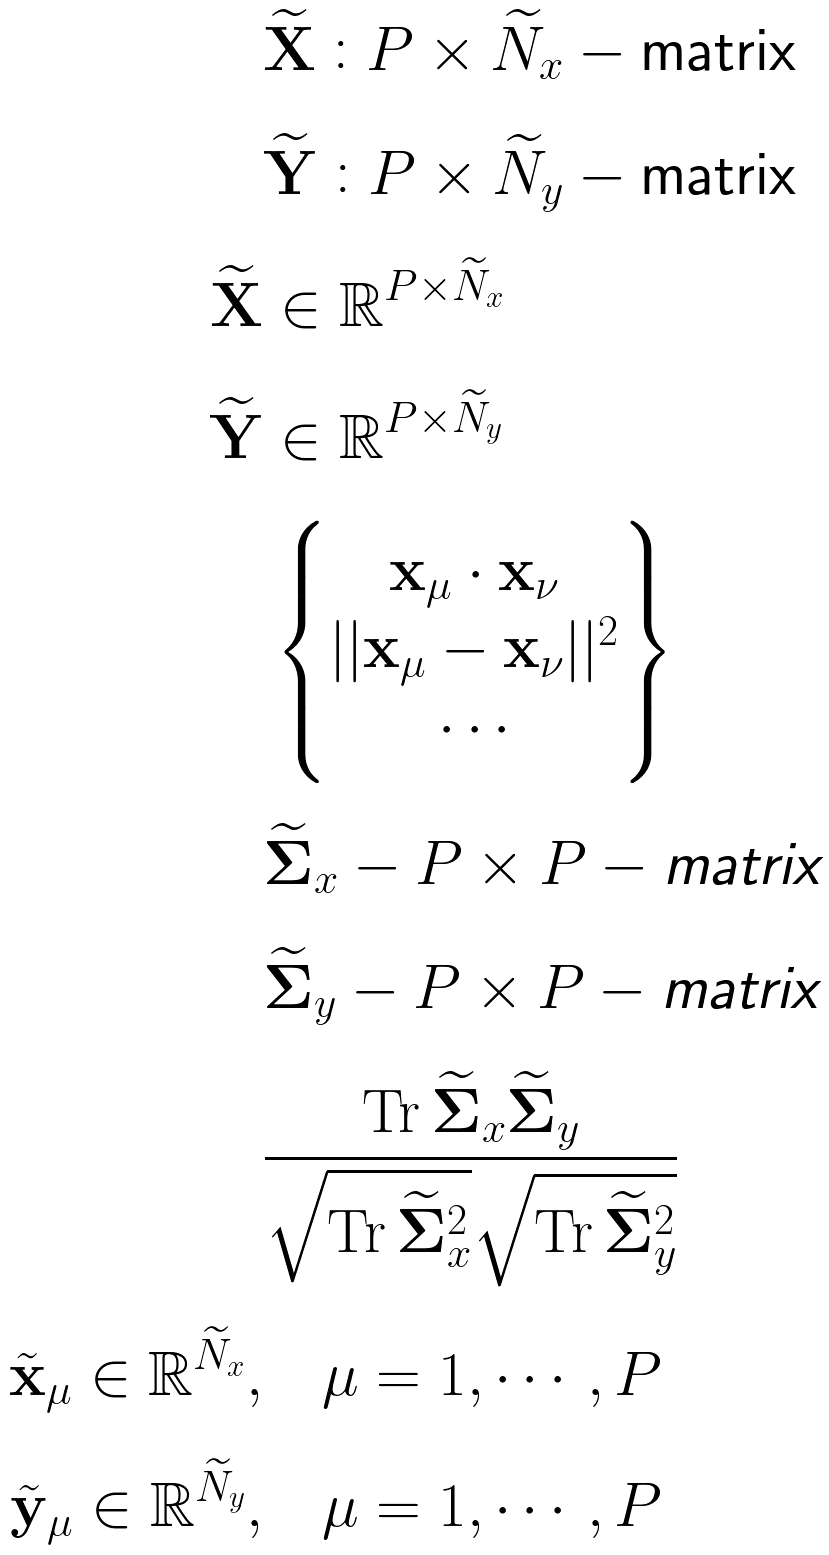

In [2]:
latex_list = [
    r"&\widetilde\X: P \times \widetilde N_x - \text{matrix}",
    r"&\widetilde\Y: P \times \widetilde N_y - \text{matrix}",
    r"\widetilde\X &\in \bR^{P \times \widetilde N_x}",
    r"\widetilde\Y &\in \bR^{P \times \widetilde N_y}",
    r"&\begin{Bmatrix} \x_\mu \cdot\x_\nu \\||\x_\mu-\x_\nu||^2 \\ \cdots \end{Bmatrix}",
    r"&\widetilde\bSigma_x - P\times P - \textit{matrix}",
    r"&\widetilde\bSigma_y - P\times P - \textit{matrix}",
    r"&\frac{\Tr \widetilde\bSigma_x\widetilde\bSigma_y}{\sqrt{\Tr \widetilde\bSigma_x^2} \sqrt {\Tr\widetilde\bSigma_y^2}}",
    r"\tilde\x_\mu \in \bR^{\widetilde N_x}, &\quad \mu = 1, \cdots, P",
    r"\tilde\y_\mu \in \bR^{\widetilde N_y}, &\quad \mu = 1, \cdots, P",
]

# format = "pdf"
format = "svg"

# env = "align"
# env = "alignat"
env = "aligned"

generate_latex_equation(latex_list, env=env, format=format)

### All equations at once as a multiline string

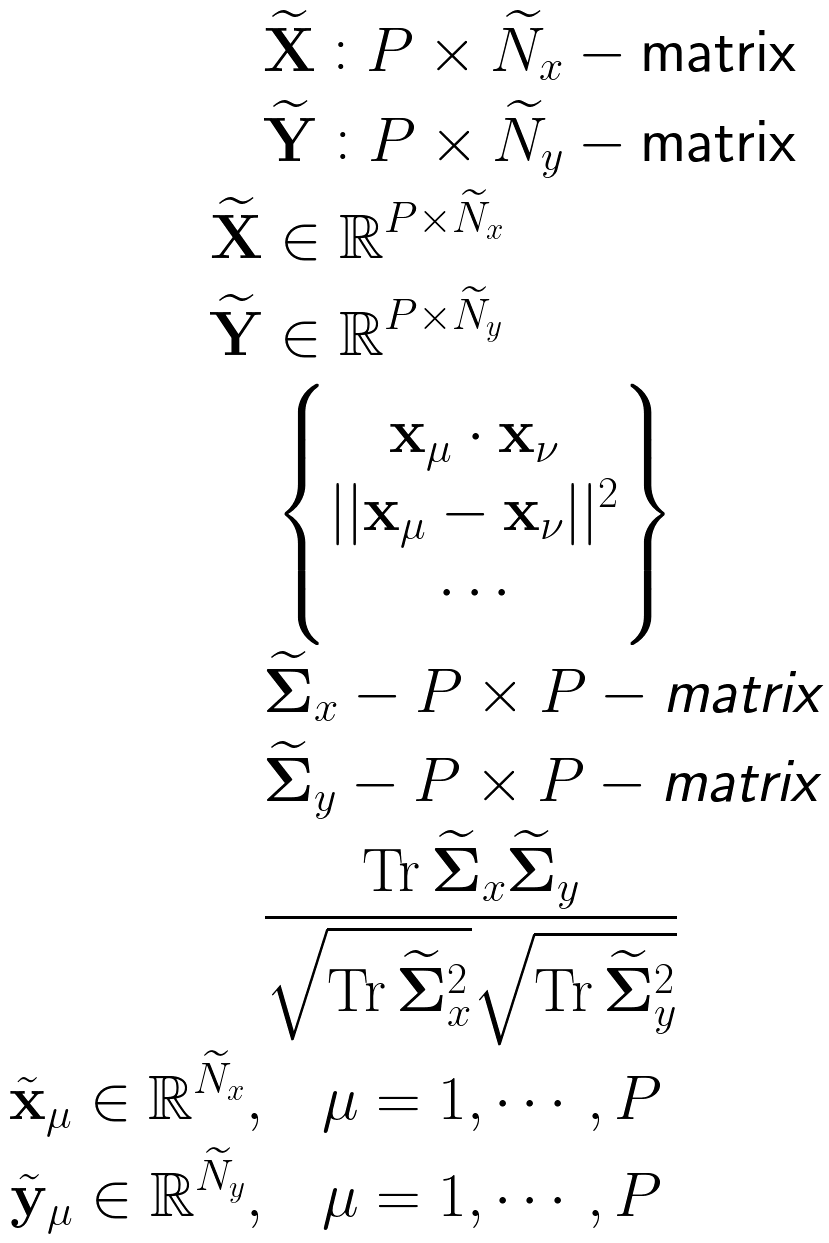

In [3]:
latex_equation = r"""
    &\widetilde\X: P \times \widetilde N_x - \text{matrix} \\
    &\widetilde\Y: P \times \widetilde N_y - \text{matrix} \\
    \widetilde\X &\in \bR^{P \times \widetilde N_x} \\
    \widetilde\Y &\in \bR^{P \times \widetilde N_y} \\
    &\begin{Bmatrix} \x_\mu \cdot\x_\nu \\||\x_\mu-\x_\nu||^2 \\ \cdots \end{Bmatrix} \\
    &\widetilde\bSigma_x - P\times P - \textit{matrix} \\
    &\widetilde\bSigma_y - P\times P - \textit{matrix} \\
    &\frac{\Tr \widetilde\bSigma_x\widetilde\bSigma_y}{\sqrt{\Tr \widetilde\bSigma_x^2} \sqrt {\Tr\widetilde\bSigma_y^2}} \\
    \tilde\x_\mu \in \bR^{\widetilde N_x}, &\quad \mu = 1, \cdots, P \\
    \tilde\y_\mu \in \bR^{\widetilde N_y}, &\quad \mu = 1, \cdots, P
"""

# format = "pdf"
format = "svg"

# env = "align"
# env = "alignat"
env = "aligned"

generate_latex_equation(latex_equation, env=env, format=format)

### Generate algorithms

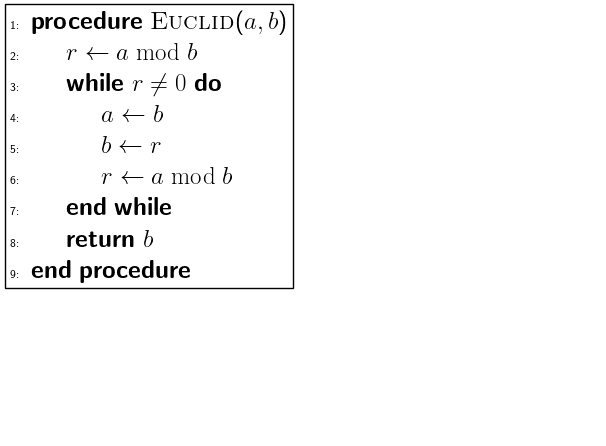

In [4]:
latex_alg= r"""
\begin{algorithmic}[1]
    \Procedure{Euclid}{$a,b$} 
        \State $r\gets a \bmod b$
        \While{$r\not=0$}
            \State $a \gets b$
            \State $b \gets r$
            \State $r \gets a \bmod b$
        \EndWhile\label{euclidendwhile}
        \State \textbf{return} $b$
    \EndProcedure
\end{algorithmic}
"""

generate_algorithm(latex_alg, format="svg")